# Planar Data Classification


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import sklearn.datasets
import sklearn.linear_model


####  This function loads the data from the specified CSV file into a pandas DataFrame named df. 

Could not use the plannar library as it is not available in the Python environment. Instead, I used the csv I pulled from a github repo `https://github.com/Kulbear/deep-learning-coursera`

In [2]:
df = pd.read_csv("planar_dataset.csv")

## Initial Plannar Data

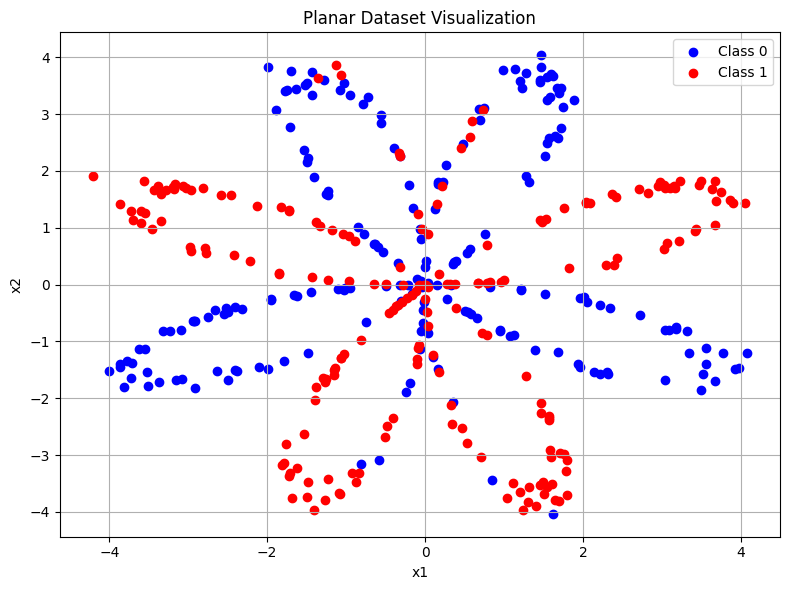

In [3]:
import matplotlib.pyplot as plt

# Separate data by class for plotting
class_0 = df[df["label"] == 0]
class_1 = df[df["label"] == 1]

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(class_0["x1"], class_0["x2"], color="blue", label="Class 0")
plt.scatter(class_1["x1"], class_1["x2"], color="red", label="Class 1")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Planar Dataset Visualization")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [14]:
def sigmoid(X):
    return 1 / (1 + np.exp(-X))

In [6]:

def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]
    
    # YOUR CODE ENDS HERE
    return (n_x, n_h, n_y)

In [7]:
# Convert the DataFrame to match the input shape expected by layer_sizes function
X_test = df[["x1", "x2"]].values.T  # shape (2, 400)
Y_test = df[["label"]].values.T    # shape (1, 400)

# Test the function
layer_sizes(X_test, Y_test)

(2, 4, 1)

In [12]:

def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """    
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    
    # YOUR CODE ENDS HERE

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [10]:
# Use the layer sizes from the previous step
n_x, n_h, n_y = layer_sizes(X_test, Y_test)
# Test the function
parameters_test = initialize_parameters(n_x, n_h, n_y)
parameters_test

{'W1': array([[-0.01587975,  0.00392196],
        [-0.02043707, -0.01263234],
        [ 0.01240332, -0.00552088],
        [ 0.00886622,  0.00084377]]),
 'b1': array([[0.],
        [0.],
        [0.],
        [0.]]),
 'W2': array([[-0.01899233, -0.00856761,  0.01128616, -0.00389745]]),
 'b2': array([[0.]])}

In [13]:
n_x, n_h, n_y = 2, 4, 1
params = initialize_parameters(n_x, n_h, n_y)

print("W1:", params["W1"])
print("b1:", params["b1"])
print("W2:", params["W2"])
print("b2:", params["b2"])

W1: [[-0.00200934 -0.00425554]
 [ 0.01633703  0.01768734]
 [-0.00079437 -0.00463805]
 [-0.00418222  0.01423572]]
b1: [[0.]
 [0.]
 [0.]
 [0.]]
W2: [[-0.01140949  0.00848139 -0.02019327  0.00822423]]
b2: [[0.]]


## The Loop

### Forward Propagation

In [15]:

def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    

    
    # Implement Forward Propagation to calculate A2 (probabilities)
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    # YOUR CODE ENDS HERE
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [ ]:
# Prepare inputs
X = df[["x1", "x2"]].values.T  # shape (2, 400)
Y = df[["label"]].values.T    # shape (1, 400)
n_x, n_h, n_y = layer_sizes(X, Y)
params = initialize_parameters(n_x, n_h, n_y)

# Run test
A2, cache = forward_propagation(X, params)

# Check output
print("A2 shape:", A2.shape)
print("A2 preview:\n", A2[:, :5])  # show first 5 predictions

A2 shape: (1, 400)
A2 preview:
 [[0.49991301 0.50008475 0.5000701  0.50012752 0.49990908]]


### Computing the Cost Function

In [ ]:
def compute_cost(A2, Y):
    """
    Computes the cross-entropy cost given in equation (13)
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost given equation (13)
    
    """
    
    m = Y.shape[1] # number of examples

    # Compute the cross-entropy cost
    logprobs = np.multiply(np.log(A2),Y) + np.multiply(np.log(1 - A2), (1 - Y))
    cost = - np.sum(logprobs) / m
    
    
    cost = float(np.squeeze(cost))  # makes sure cost is the dimension we expect. 
                                    # E.g., turns [[17]] into 17 
    
    return cost

#### Testing the compute cost function

In [18]:
cost = compute_cost(A2, Y)
cost

0.6931017621983844

### Backward Propagation

#### The backward_propagation function, which computes the gradients of the loss with respect to the weights and biases. These gradients are then used to update the parameters during optimization.

In [19]:
def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    W1 = parameters["W1"]
    W2 = parameters["W2"]

        
    # Retrieve also A1 and A2 from dictionary "cache".
    #(≈ 2 lines of code)

    A1 = cache["A1"]
    A2 = cache["A2"]
    
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis = 1, keepdims = True)
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis = 1, keepdims = True)
    
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [20]:
grads = backward_propagation(params, cache, X, Y)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))


dW1 = [[ 3.60936450e-04 -3.18850445e-03]
 [ 7.88568342e-05 -6.84185754e-04]
 [ 8.24209781e-05 -7.19247180e-04]
 [-2.92275110e-04  2.54658138e-03]]
db1 = [[-1.32036666e-07]
 [-1.44783376e-07]
 [-9.28817477e-08]
 [ 4.15154538e-07]]
dW2 = [[ 0.00067859 -0.00336164  0.00296448 -0.00271557]]
db2 = [[-6.58352465e-06]]


#### The `update_parameters` function, which adjusts the neural network's weights and biases using gradient descent. The parameters are updated in the direction that minimizes the cost function, based on the gradients computed during backpropagation.

In [21]:
def update_parameters(parameters, grads, learning_rate = 1.2):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    # Retrieve a copy of each parameter from the dictionary "parameters". Use copy.deepcopy(...) for W1 and W2
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]
    
    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads["dW1"]
    dW2 = grads["dW2"]
    db1 = grads["db1"]
    db2 = grads["db2"]
    
    # Update rule for each parameter
    W1 -= learning_rate * dW1
    W2 -= learning_rate * dW2
    b1 -= learning_rate * db1
    b2 -= learning_rate * db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [22]:
parameters = update_parameters(params, grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))


W1 = [[-0.01206857  0.0059565 ]
 [ 0.0082121  -0.01534183]
 [-0.00579576  0.01529918]
 [ 0.00927273 -0.0158531 ]]
b1 = [[ 1.58444000e-07]
 [ 1.73740052e-07]
 [ 1.11458097e-07]
 [-4.98185445e-07]]
W2 = [[-0.01700539  0.00054115 -0.00722628  0.01623405]]
b2 = [[7.90022958e-06]]


## Integrating the whole model in one function

In [23]:
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    # Initialize parameters
    parameters = initialize_parameters(n_x, n_h, n_y)
    # Loop (gradient descent)

    for i in range(0, num_iterations):
         
        #(≈ 4 lines of code)
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X, parameters)
        cost = compute_cost(A2,Y)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters =  update_parameters(parameters, grads)
        
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

### Predict Fuction

#### The `predict` function, which uses the trained neural network parameters to make predictions on new input data. It performs forward propagation and then classifies the output probabilities into binary labels (0 or 1).

In [ ]:
def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    A2, cache = forward_propagation(X, parameters)
    predictions = (A2 > 0.5).astype(bool)
    
    return predictions

### Train Neural Network and Plot Decision Boundary

#### This cell trains the neural network model using the `nn_model` function and then visualizes its decision boundary using the plot_decision_boundary helper function.

Cost after iteration 0: 0.693162
Cost after iteration 1000: 0.258625
Cost after iteration 2000: 0.239334
Cost after iteration 3000: 0.230802
Cost after iteration 4000: 0.225528
Cost after iteration 5000: 0.221845
Cost after iteration 6000: 0.219094
Cost after iteration 7000: 0.220614
Cost after iteration 8000: 0.219396
Cost after iteration 9000: 0.218481


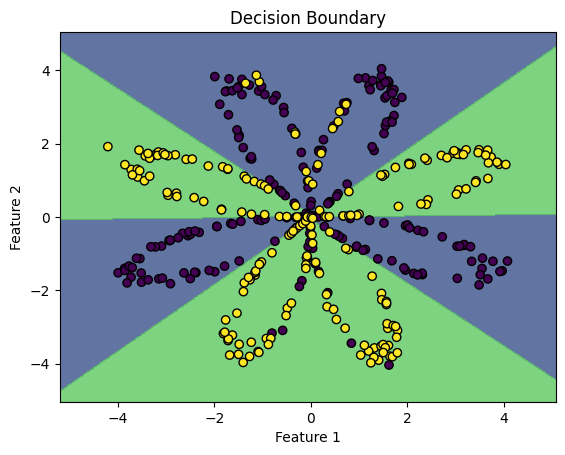

In [27]:
parameters = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)

# Create a mesh grid for plotting
x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
# Predict the class for each point in the mesh grid
# Ensure the input to predict is transposed
Z = predict(parameters, np.c_[xx.ravel(), yy.ravel()].T)  # Transpose here
Z = Z.reshape(xx.shape)
# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[0, :], X[1, :], c=Y, edgecolors='k', marker='o')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary')
plt.show()